In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('customer_clustering_data.csv')

In [4]:
data

,Annual Income (k$),Spending Score (1-100)
0,6.454695,7.268467
1,5.766484,6.431171
2,5.477369,2.087178
3,3.198239,7.739520
4,2.898585,6.759572
...,...,...
995,3.787372,5.067560
996,1.573018,9.956804
997,3.215781,5.921743
998,3.725611,1.692713


In [5]:
x = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
inertia=[]
k_values = range(1,11)

In [7]:
for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

C:\Users\Gaurav\anaconda3\envs\100days_of_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Gaurav\anaconda3\envs\100days_of_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Gaurav\anaconda3\envs\100days_of_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Gaurav\anaconda3\envs\100days_of_ml\Lib\site-packages\sklearn\clust

Text(0, 0.5, 'inertia')

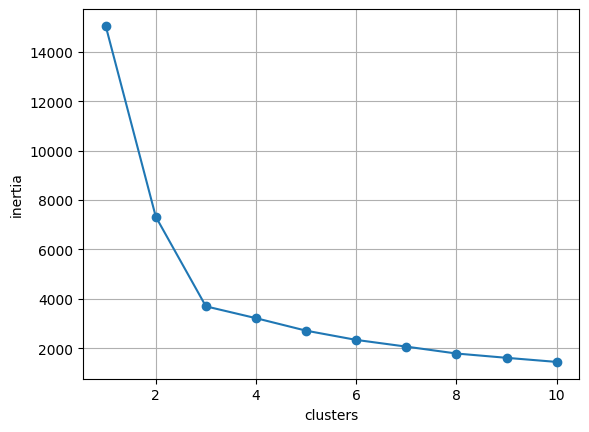

In [8]:
plt.plot(k_values, inertia, marker='o')
plt.grid()
plt.xlabel('clusters')
plt.ylabel('inertia')

In [9]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(x)

C:\Users\Gaurav\anaconda3\envs\100days_of_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [10]:
data['Cluster']=kmeans.labels_
data

,Annual Income (k$),Spending Score (1-100),Cluster
0,6.454695,7.268467,3
1,5.766484,6.431171,3
2,5.477369,2.087178,1
3,3.198239,7.739520,0
4,2.898585,6.759572,0
...,...,...,...
995,3.787372,5.067560,0
996,1.573018,9.956804,2
997,3.215781,5.921743,0
998,3.725611,1.692713,1


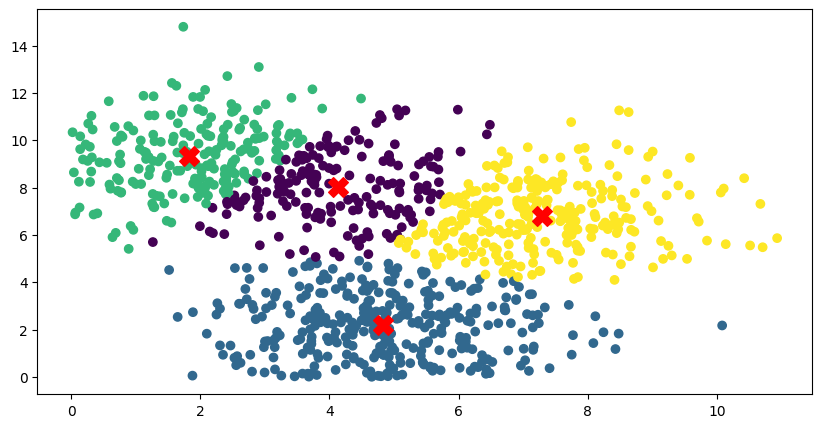

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'])
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X')